In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from __future__ import division
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df = pd.read_csv('dataset/creditcard.csv')

In [3]:
count_normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
count_fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
fraud_indices = np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data

def undersample(normal_indices, fraud_indices, multiple): # multiple denote the normal data = multiple * fraud data
    normal_indices_undersample = np.array(np.random.choice(normal_indices,(multiple*count_fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices, normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    
#     print "the normal transacation proportion is :", len(undersample_data[undersample_data.Class==0])/len(undersample_data)
#     print "the fraud transacation proportion is :", len(undersample_data[undersample_data.Class==1])/len(undersample_data)
#     print "total number of record in resampled data is:",len(undersample_data)
    return(undersample_data)

In [4]:
def prediction_algorithms(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    print "the recall for this model is :",cm[1,1] / (cm[1,1] + cm[1,0])
    print "The accuracy is :", (cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print "TP",cm[1,1] # no of fraud transaction which are predicted fraud
    print "TN",cm[0,0] # no. of normal transaction which are predited normal
    print "FP",cm[0,1] # no of normal transaction which are predicted fraud
    print "FN",cm[1,0] # no of fraud Transaction which are predicted normal
    sns.heatmap(cm, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "Classification Report:" 
    print(classification_report(labels_test,pred))

In [5]:
def custom_loss_fuction(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    loss = (1 - precision) * 88.29 + (1 - recall) * 122.12
    return loss

### This part is for testing all the algorithms on the baseline dataset. Which means all the features will be used without any pre-processing.
***

the recall for this model is : 0.6
The accuracy is : 0.9990871042948232
TP 72
TN 71065
FP 17
FN 48


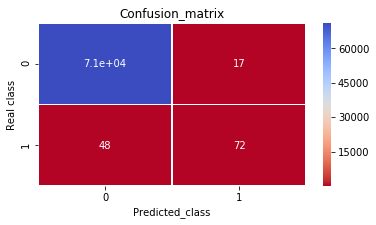

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.81      0.60      0.69       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the recall for this model is : 0.025
The accuracy is : 0.9983567877306817
TP 3
TN 71082
FP 0
FN 117


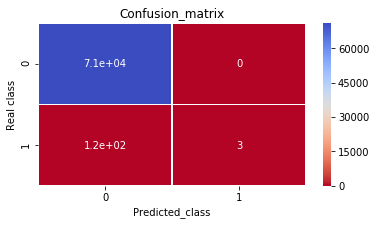

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.03      0.05       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the recall for this model is : 0.75
The accuracy is : 0.9994943962248252
TP 90
TN 71076
FP 6
FN 30


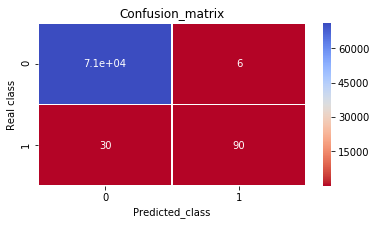

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.75      0.83       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the recall for this model is : 0.475
The accuracy is : 0.9989185697030982
TP 57
TN 71068
FP 14
FN 63


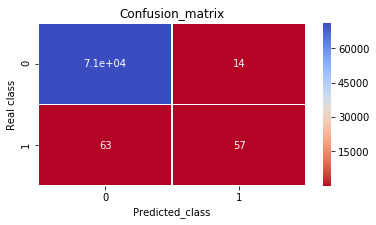

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.80      0.47      0.60       120

avg / total       1.00      1.00      1.00     71202



In [7]:
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LogisticRegression(random_state=0)
prediction_algorithms(lr, X_train, X_test, y_train, y_test)
print "________________________________________________________________________________________________________"
print ""
svm = SVC(random_state=0)
prediction_algorithms(svm, X_train, X_test, y_train, y_test)
print "________________________________________________________________________________________________________"
print ""
rf = RandomForestClassifier(random_state=0)
prediction_algorithms(rf, X_train, X_test, y_train, y_test)
print "________________________________________________________________________________________________________"
print ""
gbt = GradientBoostingClassifier(random_state=0)
prediction_algorithms(gbt, X_train, X_test, y_train, y_test)

### Logistic Regression

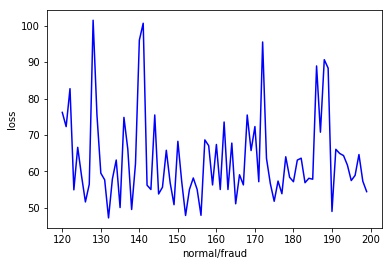

optimal proportion of normal/fraud is :  132
min loss is :  47.233513513513515

the model classification for 132 proportion
the recall for this model is : 0.7416666666666667
The accuracy is : 0.9990590151962023
TP 89
TN 71046
FP 36
FN 31


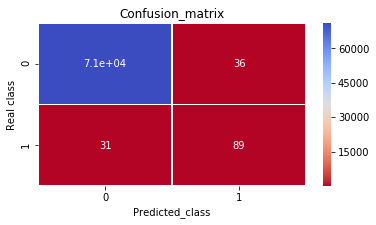

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.71      0.74      0.73       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [30]:
proportion = []
loss = []
for i in range(120,200):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    lr = LogisticRegression(random_state=0)
    loss.append(custom_loss_fuction(lr, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LogisticRegression(random_state=0)
prediction_algorithms(lr, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Vector Support Machine

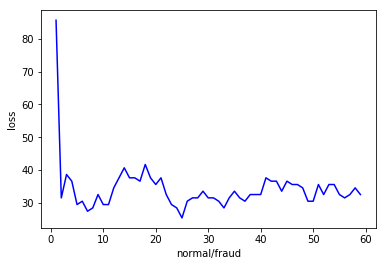

optimal proportion of normal/fraud is :  25
min loss is :  25.441666666666674

the model classification for 25 proportion
the recall for this model is : 0.775
The accuracy is : 0.9996207971686188
TP 93
TN 71082
FP 0
FN 27


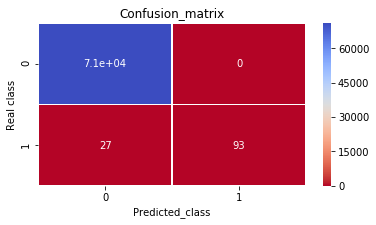

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.78      0.87       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [34]:
proportion = []
loss = []
for i in range(1, 60):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    svm = SVC(random_state = 0)
    loss.append(custom_loss_fuction(svm, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
svm = SVC(random_state=0)
prediction_algorithms(svm, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Random Forest

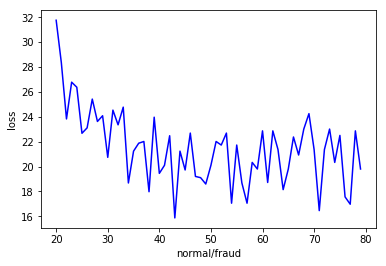

optimal proportion of normal/fraud is :  43
min loss is :  15.871844783715009

the model classification for 43 proportion
the recall for this model is : 0.9666666666666667
The accuracy is : 0.9995646189713772
TP 116
TN 71055
FP 27
FN 4


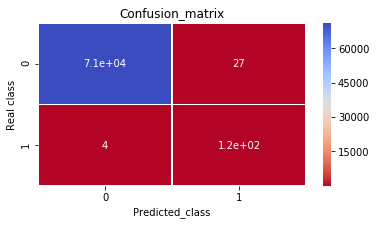

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.81      0.97      0.88       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [28]:
proportion = []
loss = []
for i in range(20,80):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    loss.append(custom_loss_fuction(rf, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
rf = RandomForestClassifier(n_estimators=100, random_state=0)
prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Gradient Boosting Decision Tree

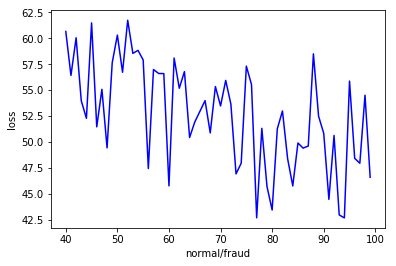

optimal proportion of normal/fraud is :  94
min loss is :  42.68959420289855
the undersample data for 94 proportion

the model classification for 94 proportion
the recall for this model is : 0.9416666666666667
The accuracy is : 0.9984410550265442
TP 113
TN 70978
FP 104
FN 7


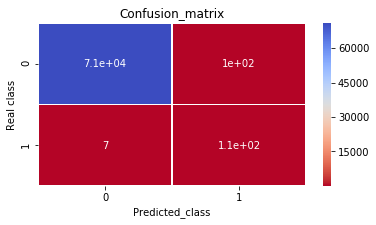

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.52      0.94      0.67       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [33]:
proportion = []
loss = []
for i in range(40, 100):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    gbt = GradientBoostingClassifier(random_state=0)
    loss.append(custom_loss_fuction(gbt, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
print "the undersample data for {} proportion".format(optimal_proportion)
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
gbt = GradientBoostingClassifier(random_state=0)
prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""